# Algorithm Performance Data Analysis - Run 3

Test Parameters 

| | QuadTreeThreshold | AllowedExceedingThreshold | 
| --- | --- | --- | 
| min | 120 | 0 | 
| max | 140 | 0.00100 | 
| step| 1 | 0.00001 | 
| iteration | 21 | 101 | 

In [1]:
# Import relevant modules 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv('IndividualCompressionData_since_test_20231101_134331.csv')

In [2]:
# Inspect the data
data

SN                TestID      FileName  OriginalFileSize  \
0       1  test_20231101_134331  10404007.png            502730   
1       2  test_20231101_134331   1254659.png            342646   
2       3  test_20231101_134331  10188041.png            221231   
3       4  test_20231101_134331  10287332.png            216980   
4       5  test_20231101_134331  11610969.png            368720   
...    ..                   ...           ...               ...   
20995   6  test_20231101_140725  10350842.png            212614   
20996   7  test_20231101_140725  10863862.png            317432   
20997   8  test_20231101_140725  11382381.png            312486   
20998   9  test_20231101_140725  11079715.png            443815   
20999  10  test_20231101_140725  11551286.png            271883   

       CompressedBinSize  FileSizeDifference  CompressionRate  \
0                  27377              475353         0.945543   
1                  84372              258274         0.753763   
2                  11047              210184         0.950066   
3                  13912              203068         0.935883   
4                  31817              336903         0.913710   
...                  ...                 ...              ...   
20995                 24              212590         0.999887   
20996               3462              313970         0.989094   
20997                327              312159         0.998954   
20998              82767              361048         0.813510   
20999                 24              271859         0.999912   

       CompressionTime  DecompressionTime  UniquePixelCountBefore  \
0                   20                 12                   61265   
1                    3                  8                   80080   
2                    3                  8                   41731   
3                    1                  4                   22337   
4                    3                  4                   84111   
...                ...                ...                     ...   
20995                1                  4                   42529   
20996                1                  3                   66058   
20997                2                  3                   46745   
20998                2                  4                  124136   
20999                1                  4                   40092   

       UniquePixelCountAfter  UniquePixelCountReduction  \
0                       3948                      57317   
1                      11681                      68399   
2                       1550                      40181   
3                       1894                      20443   
4                       4634                      79477   
...                      ...                        ...   
20995                      1                      42528   
20996                    508                      65550   
20997                     44                      46701   
20998                  11708                     112428   
20999                      1                      40091   

       UniquePixelCountReductionRate        MAE           MSE       PSNR  \
0                           0.935559  24.980919   3241.644400  13.023150   
1                           0.854133  19.952688   2913.615216  13.486482   
2                           0.962857  10.226011    952.977829  18.339976   
3                           0.915208   9.119531    704.396043  19.652635   
4                           0.944906  18.978633   2421.380016  14.290174   
...                              ...        ...           ...        ...   
20995                       0.999976  55.226706  11938.014080   7.361483   
20996                       0.992310  44.970226   9093.736480   8.543380   
20997                       0.999059  23.441726   2963.055792  13.413405   
20998                       0.905684  20.160807   2995.252288  13.366470   
20999                       0.999975  24.866876

In [3]:
data.describe()

SN  OriginalFileSize  CompressedBinSize  FileSizeDifference  \
count  21000.00000       21000.00000       21000.000000        21000.000000   
mean       5.50000      321053.70000       24235.137667       296818.562333   
std        2.87235       92670.57932       33613.899530        80639.101500   
min        1.00000      212614.00000          24.000000       203068.000000   
25%        3.00000      221231.00000        4062.000000       212867.000000   
50%        5.50000      314959.00000       10022.000000       302635.000000   
75%        8.00000      368720.00000       24182.000000       335978.000000   
max       10.00000      502730.00000      132247.000000       497088.000000   

       CompressionRate  CompressionTime  DecompressionTime  \
count     21000.000000     21000.000000       21000.000000   
mean          0.934159         2.009286           3.823333   
std           0.079562         0.880800           1.174530   
min           0.702022         0.000000           3.000000   
25%           0.938110         1.000000           3.000000   
50%           0.964965         2.000000           4.000000   
75%           0.984625         2.000000           4.000000   
max           0.999912        20.000000          30.000000   

       UniquePixelCountBefore  UniquePixelCountAfter  \
count            21000.000000           21000.000000   
mean             60908.400000            3421.839095   
std              27853.020634            4698.780089   
min              22337.000000               1.000000   
25%              41731.000000             597.000000   
50%              54005.000000            1417.000000   
75%              80080.000000            3509.000000   
max             124136.000000           18385.000000   

       UniquePixelCountReduction  UniquePixelCountReductionRate           MAE  \
count               21000.000000                   21000.000000  21000.000000   
mean                57486.560905                       0.955825     21.134762   
std                 24012.539721                       0.042330      7.718460   
min                 20443.000000                       0.851896      9.119531   
25%                 40544.000000                       0.932757     17.257767   
50%                 52009.000000                       0.969787     21.123513   
75%                 70915.000000                       0.988902     24.437365   
max                112428.000000                       0.999976     55.226706   

                MSE          PSNR  QuadtreeThreshold  \
count  21000.000000  21000.000000       21000.000000   
mean    2986.180256     14.041891         130.000000   
std     1763.189893      2.425740           6.055445   
min      704.396043      7.361483         120.000000   
25%     1874.251525     12.726999         125.000000   
50%     2740.878352     13.751906         130.000000   
75%     3470.407339     15.402525         135.000000   
max    11938.014080     19.652635         140.000000   

       AllowedExceedingThresholdFactor  
count                     21000.000000  
mean                          0.000495  
std                           0.000289  
min                           0.000000  
25%                           0.000247  
50%                           0.000495  
75%                           0.000743  
max                           0.000990

## Analyze per Image

In [4]:
# Select an image
image_name = data['FileName'].iloc[0]  # Gets the first image name; replace with a specific name if needed
# Get all the test result for this image
singe_image_data = data[data['FileName'] == image_name] 

In [5]:
singe_image_data

SN                TestID      FileName  OriginalFileSize  \
0       1  test_20231101_134331  10404007.png            502730   
10      1  test_20231101_134333  10404007.png            502730   
20      1  test_20231101_134333  10404007.png            502730   
30      1  test_20231101_134334  10404007.png            502730   
40      1  test_20231101_134335  10404007.png            502730   
...    ..                   ...           ...               ...   
20950   1  test_20231101_140722  10404007.png            502730   
20960   1  test_20231101_140723  10404007.png            502730   
20970   1  test_20231101_140724  10404007.png            502730   
20980   1  test_20231101_140724  10404007.png            502730   
20990   1  test_20231101_140725  10404007.png            502730   

       CompressedBinSize  FileSizeDifference  CompressionRate  \
0                  27377              475353         0.945543   
10                 27377              475353         0.945543   
20                 27377              475353         0.945543   
30                 27377              475353         0.945543   
40                 27377              475353         0.945543   
...                  ...                 ...              ...   
20950               5782              496948         0.988499   
20960               5782              496948         0.988499   
20970               5782              496948         0.988499   
20980               5642              497088         0.988777   
20990               5642              497088         0.988777   

       CompressionTime  DecompressionTime  UniquePixelCountBefore  \
0                   20                 12                   61265   
10                   2                  4                   61265   
20                   2                  4                   61265   
30                   2                  4                   61265   
40                   2                  4                   61265   
...                ...                ...                     ...   
20950                1                  3                   61265   
20960                2                  3                   61265   
20970                1                  4                   61265   
20980                2                  4                   61265   
20990                2                  4                   61265   

       UniquePixelCountAfter  UniquePixelCountReduction  \
0                       3948                      57317   
10                      3948                      57317   
20                      3948                      57317   
30                      3948                      57317   
40                      3948                      57317   
...                      ...                        ...   
20950                    845                      60420   
20960                    845                      60420   
20970                    845                      60420   
20980                    824                      60441   
20990                    824                      60441   

       UniquePixelCountReductionRate        MAE          MSE       PSNR  \
0                           0.935559  24.980919  3241.644400  13.023150   
10                          0.935559  24.980919  3241.644400  13.023150   
20                          0.935559  24.980919  3241.644400  13.023150   
30                          0.935559  24.980919  3241.644400  13.023150   
40                          0.935559  24.980919  3241.644400  13.023150   
...                              ...        ...          ...        ...   
20950                       0.986207  28.347204  4162.107488  11.937671   
20960                       0.986207  28.347204  4162.107488  11.937671   
20970                       0.986207  28.347204  4162.107488  11.937671   
20980                       0.986550  28.373376  4170.304000  11.929126   
20990                       0.986550  28.373376  4170.3040

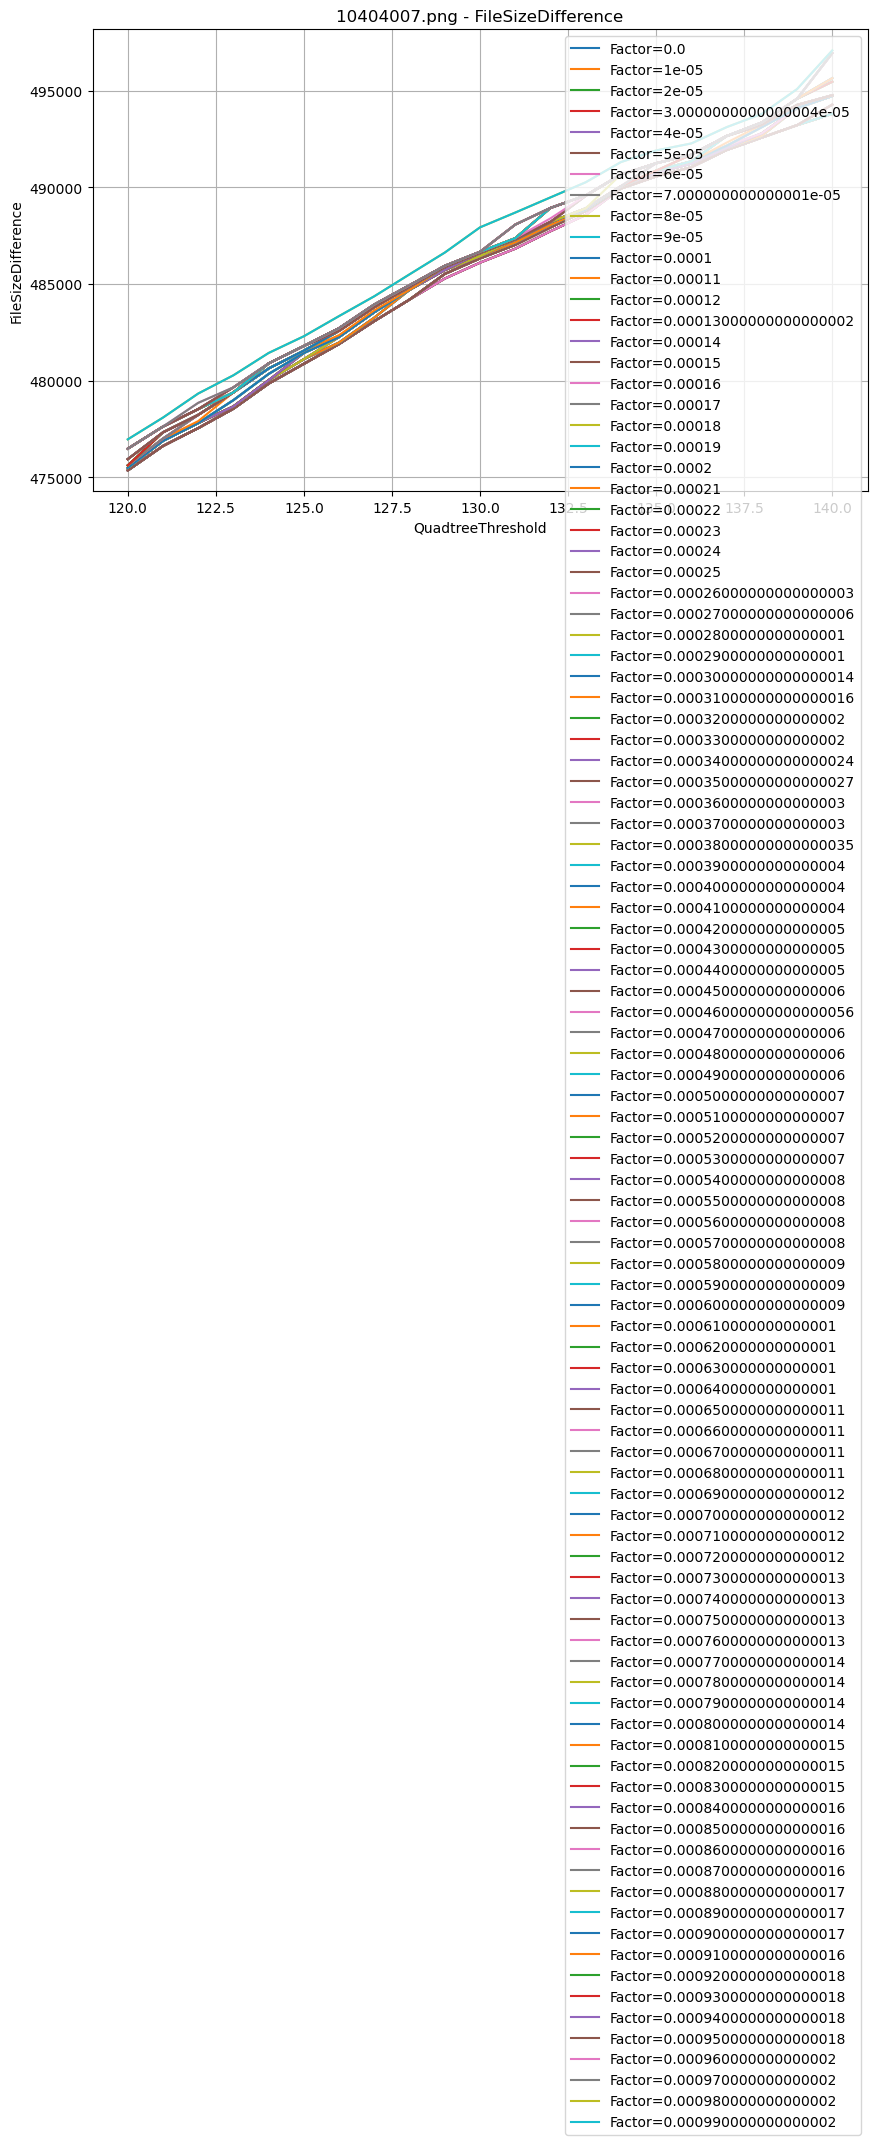

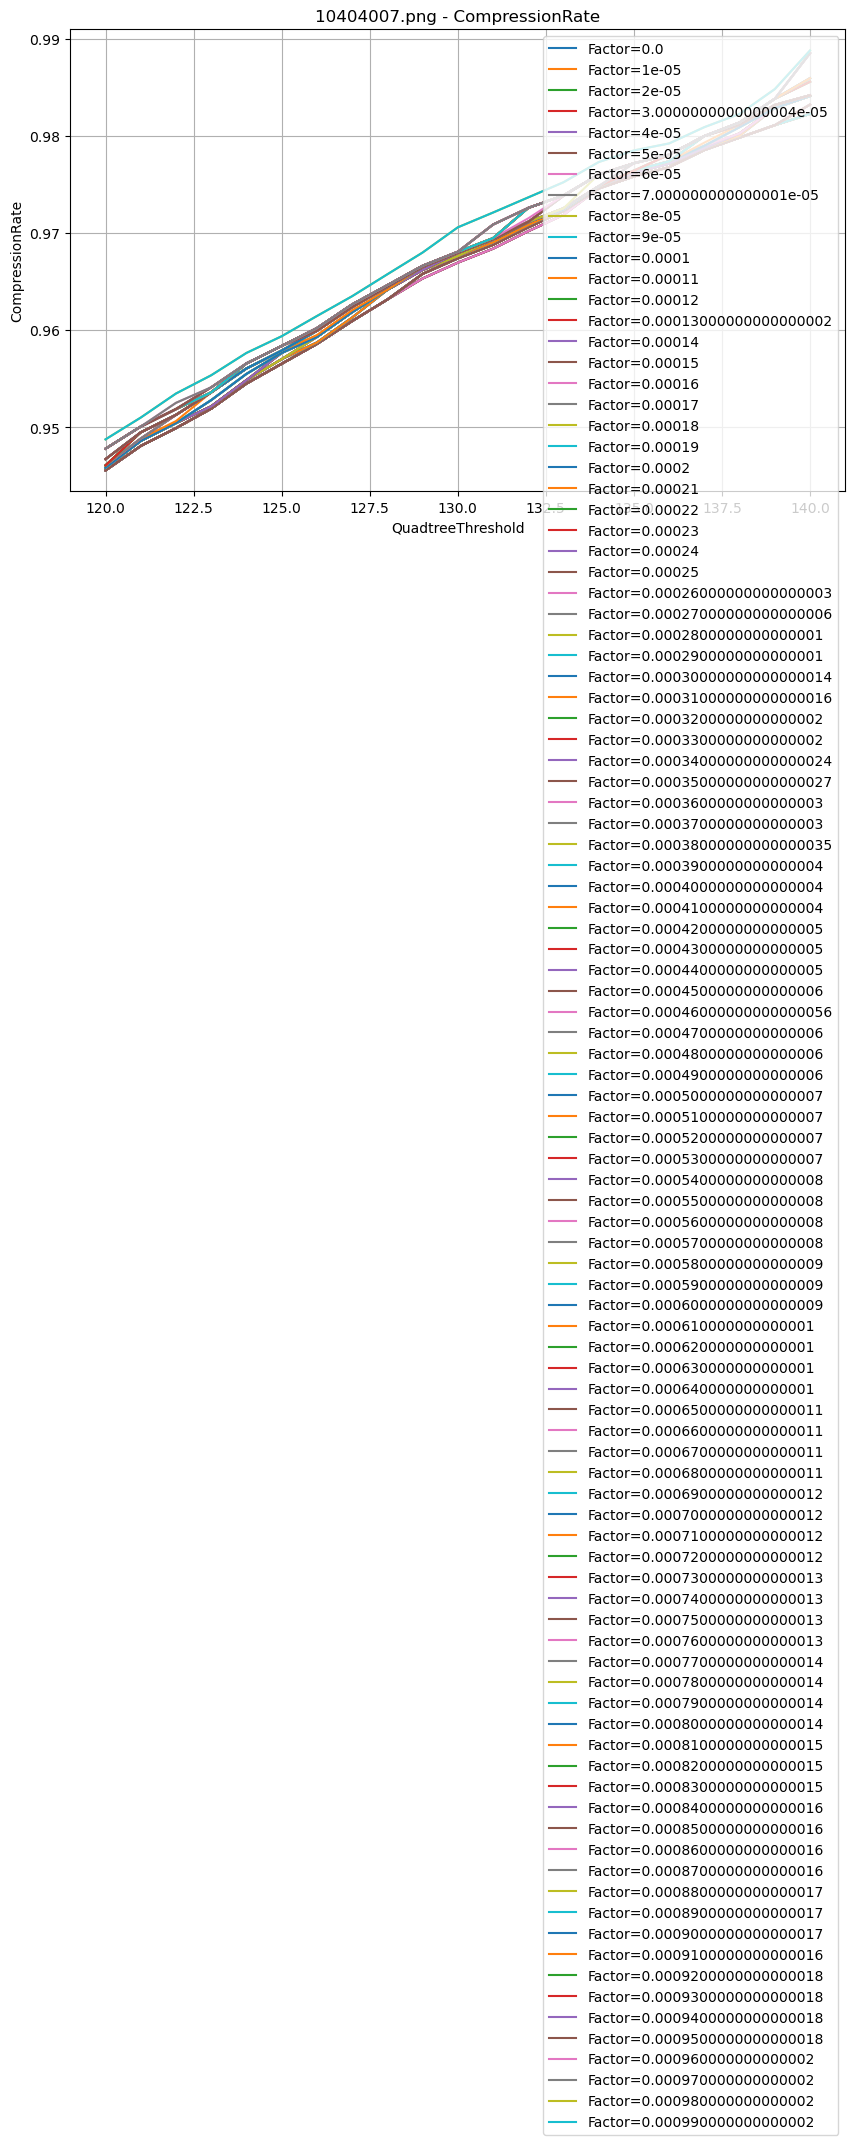

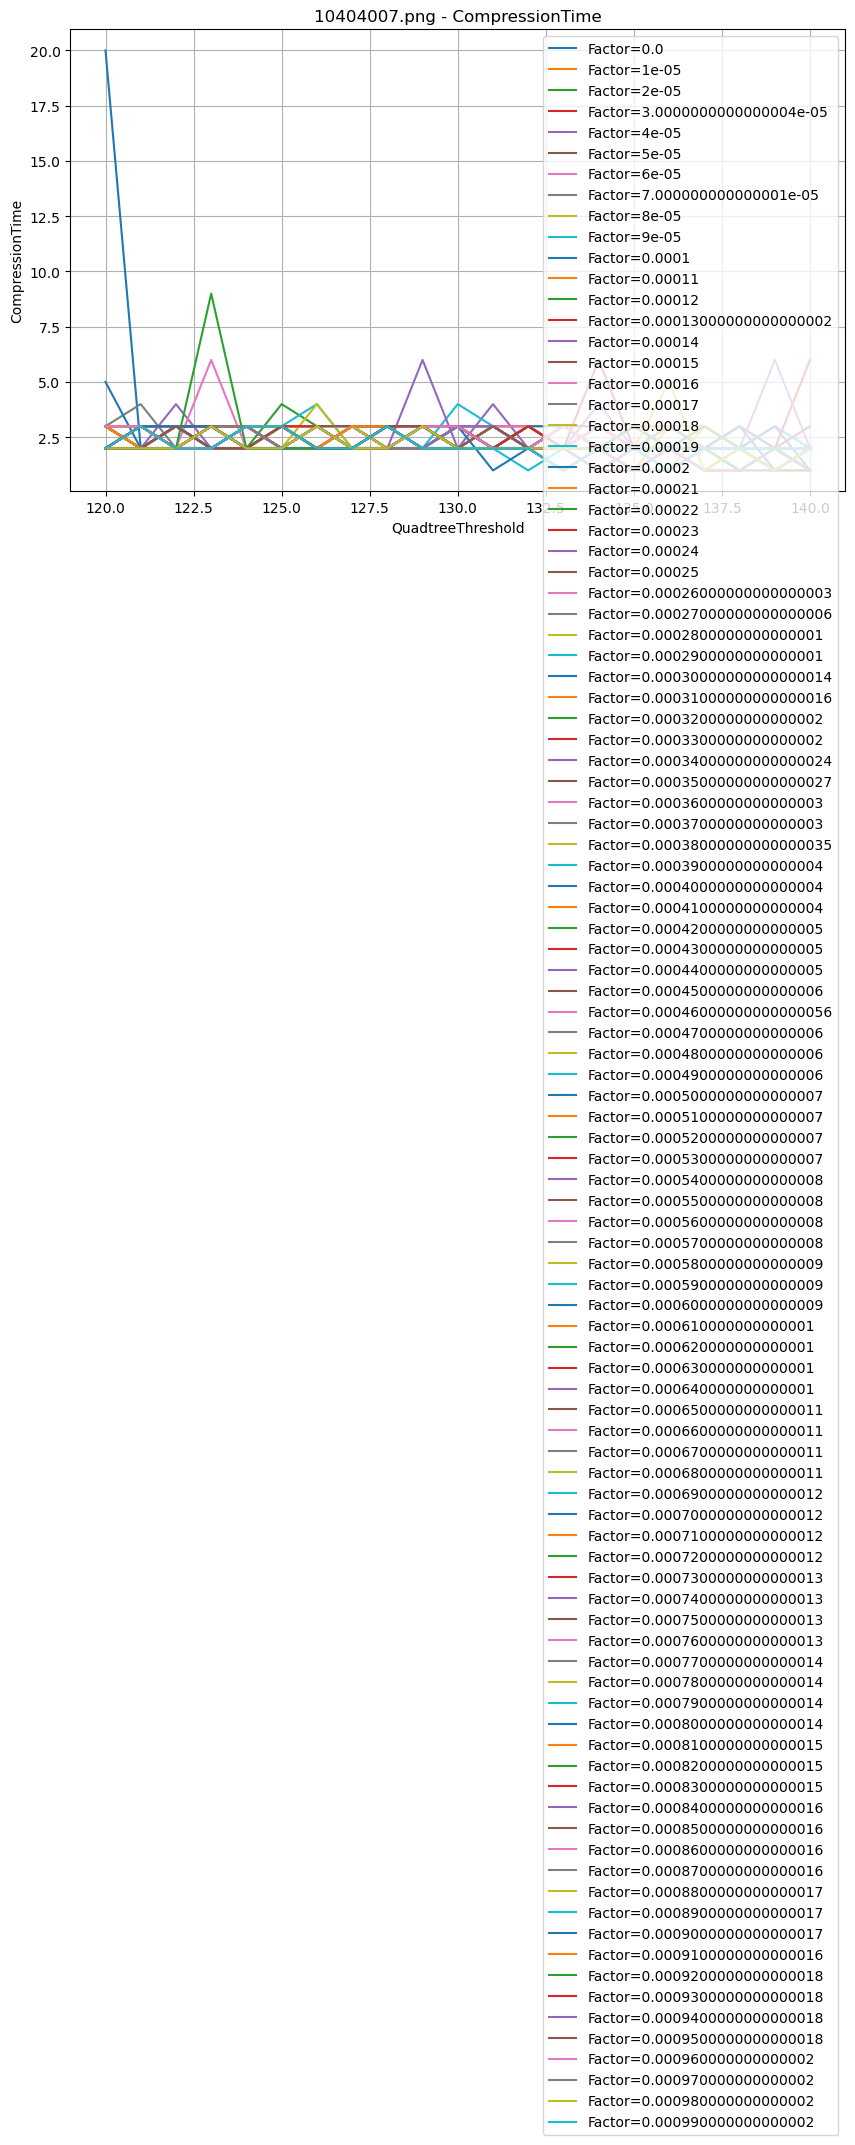

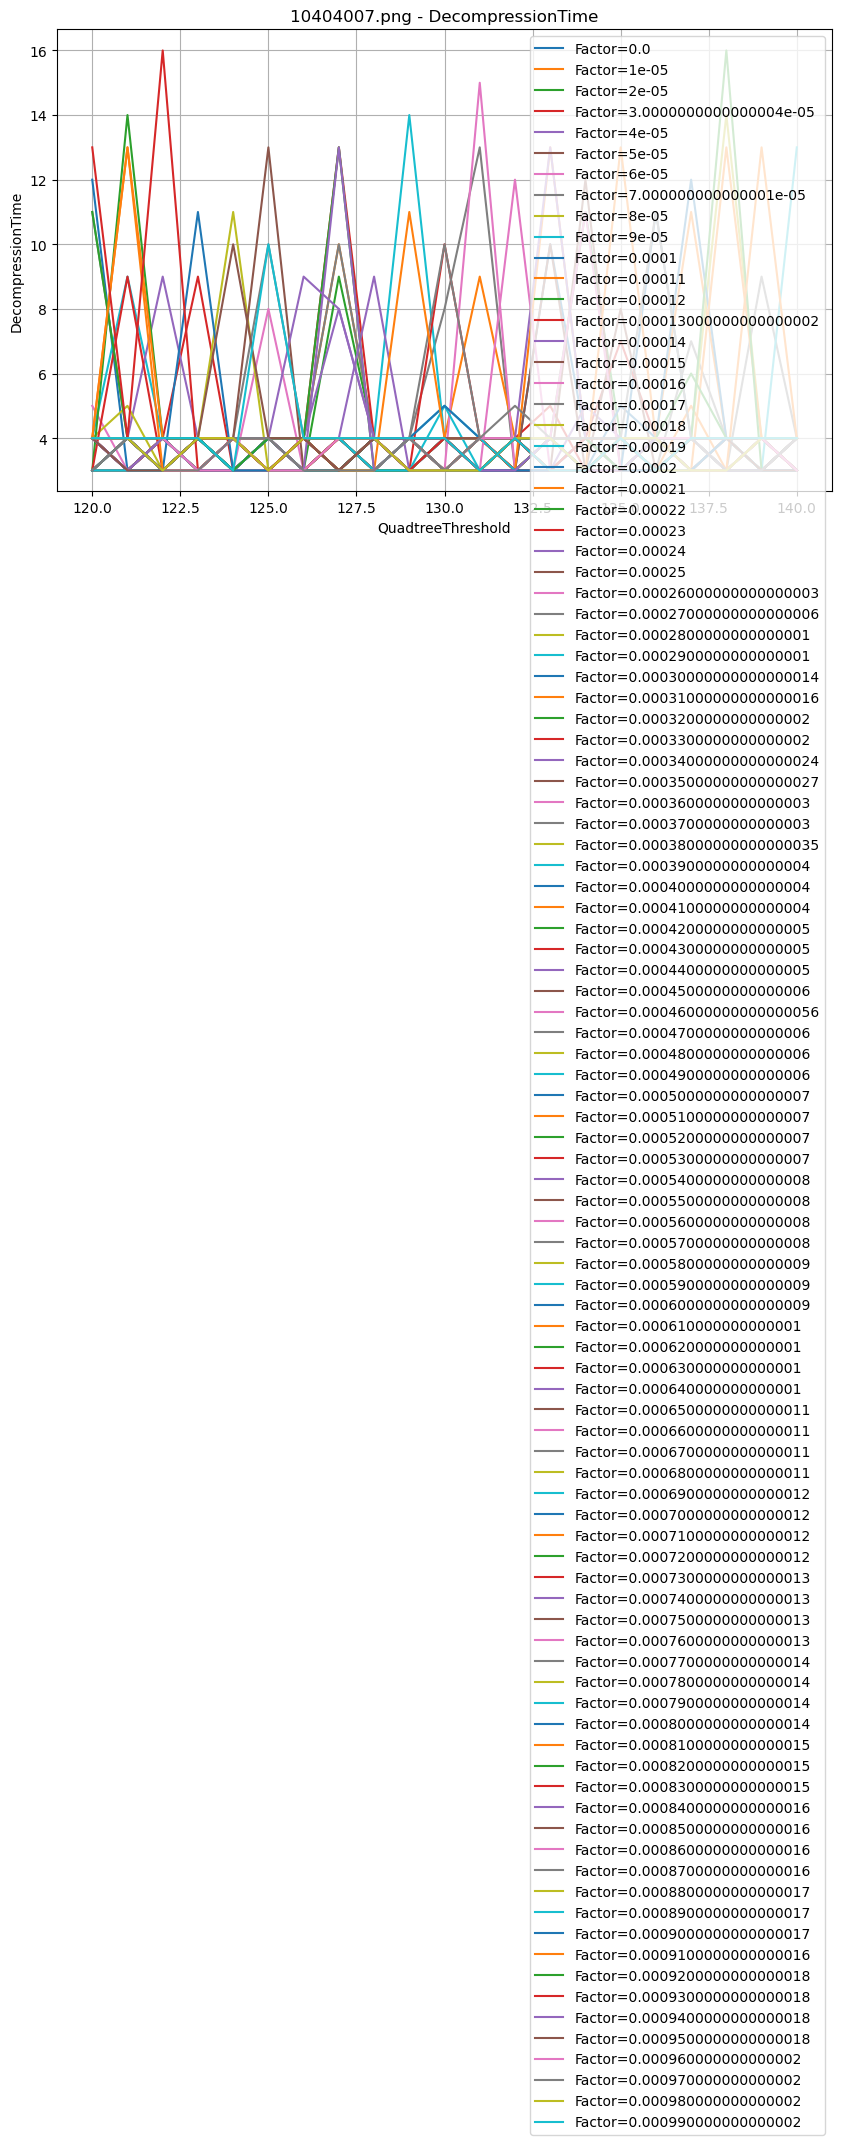

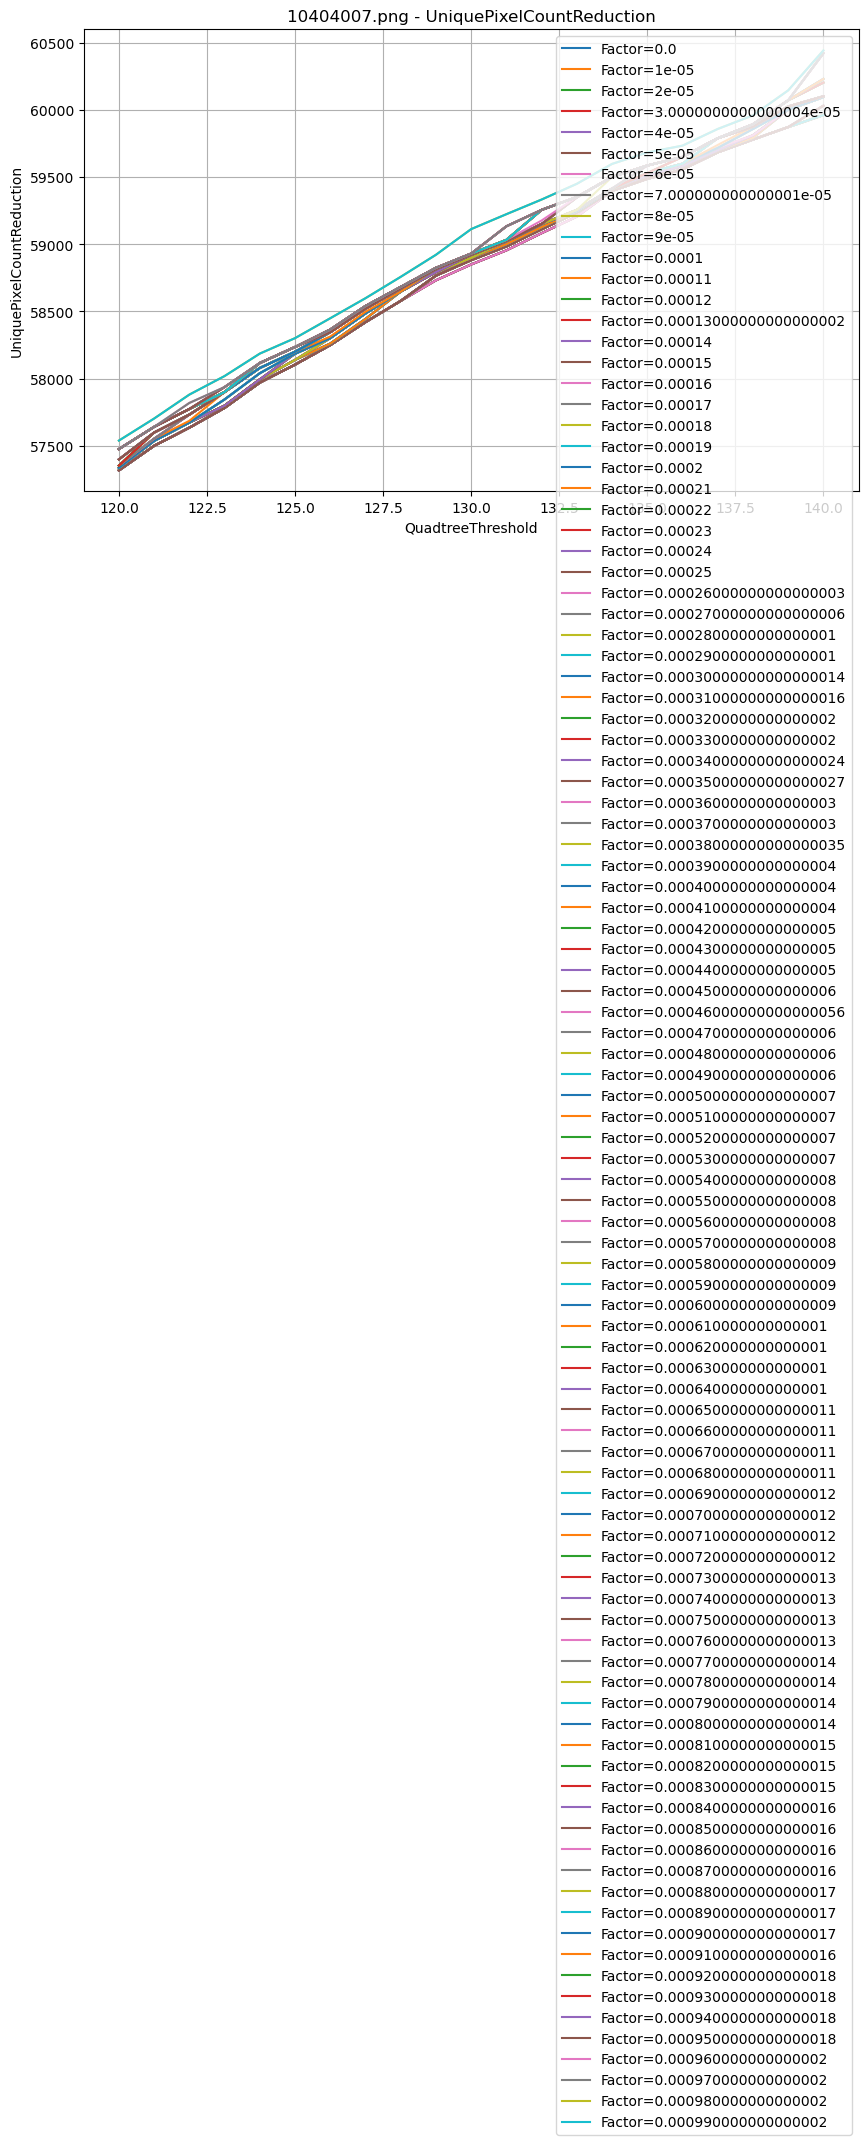

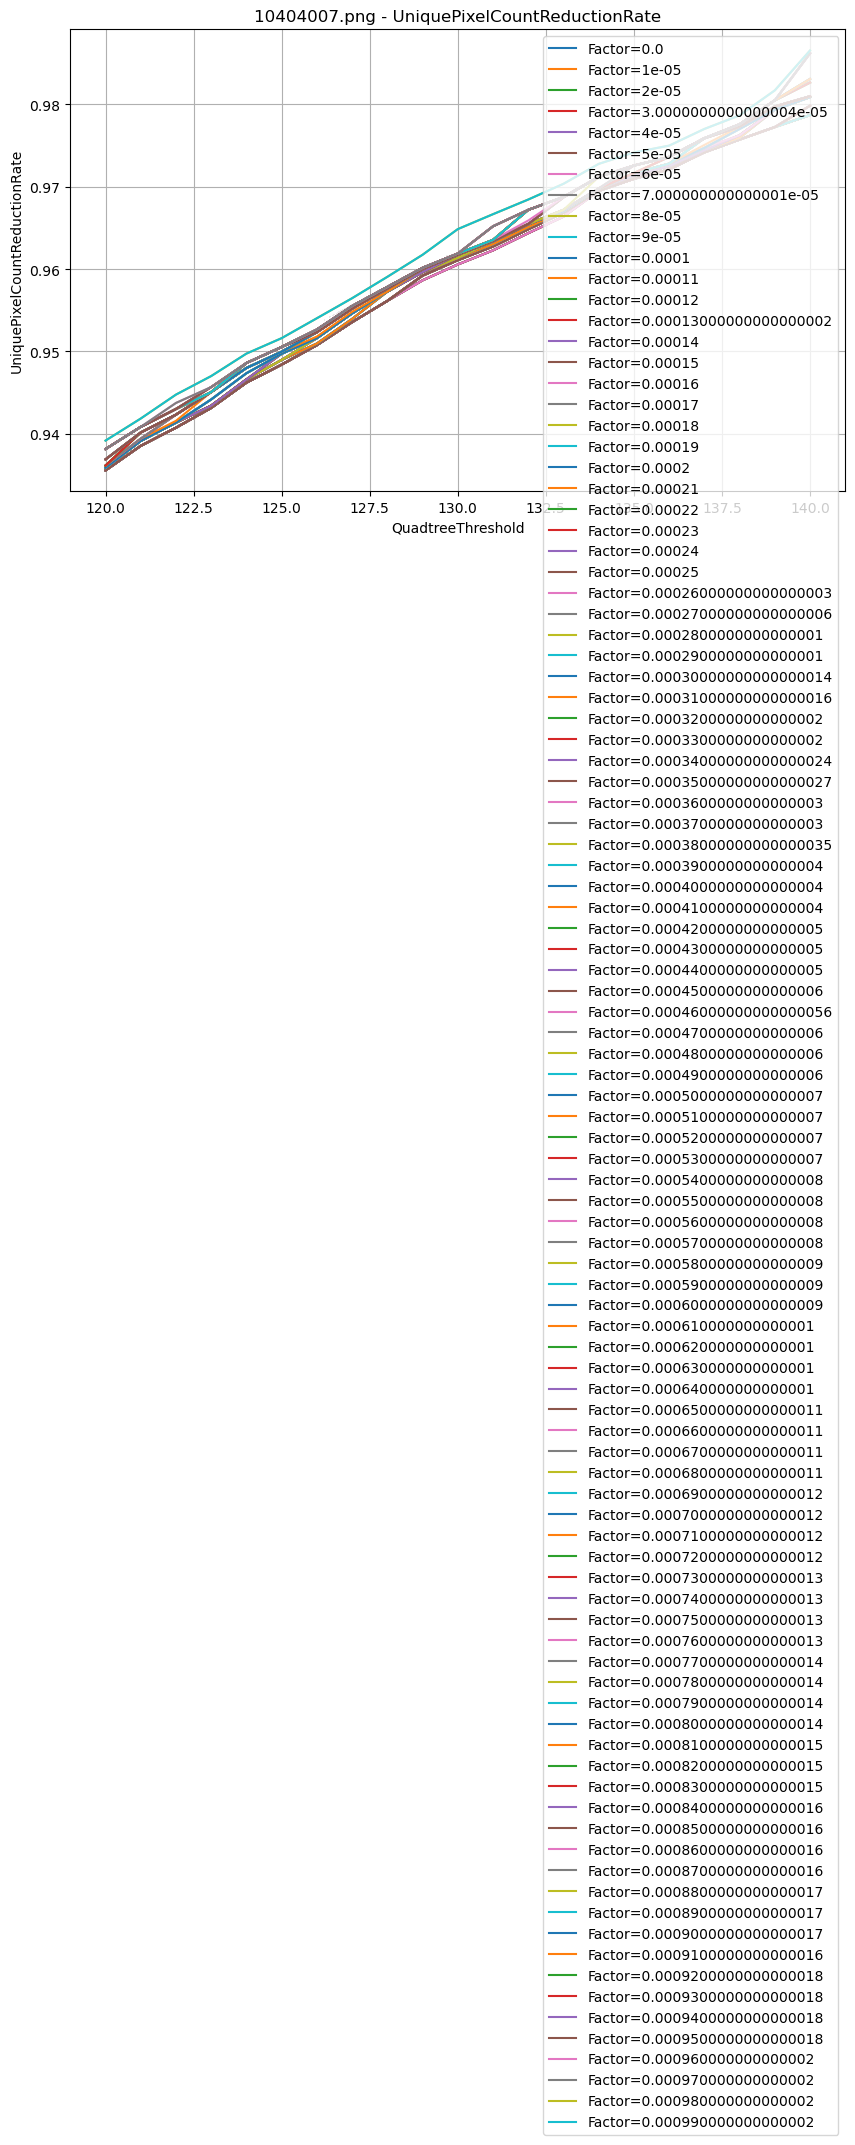

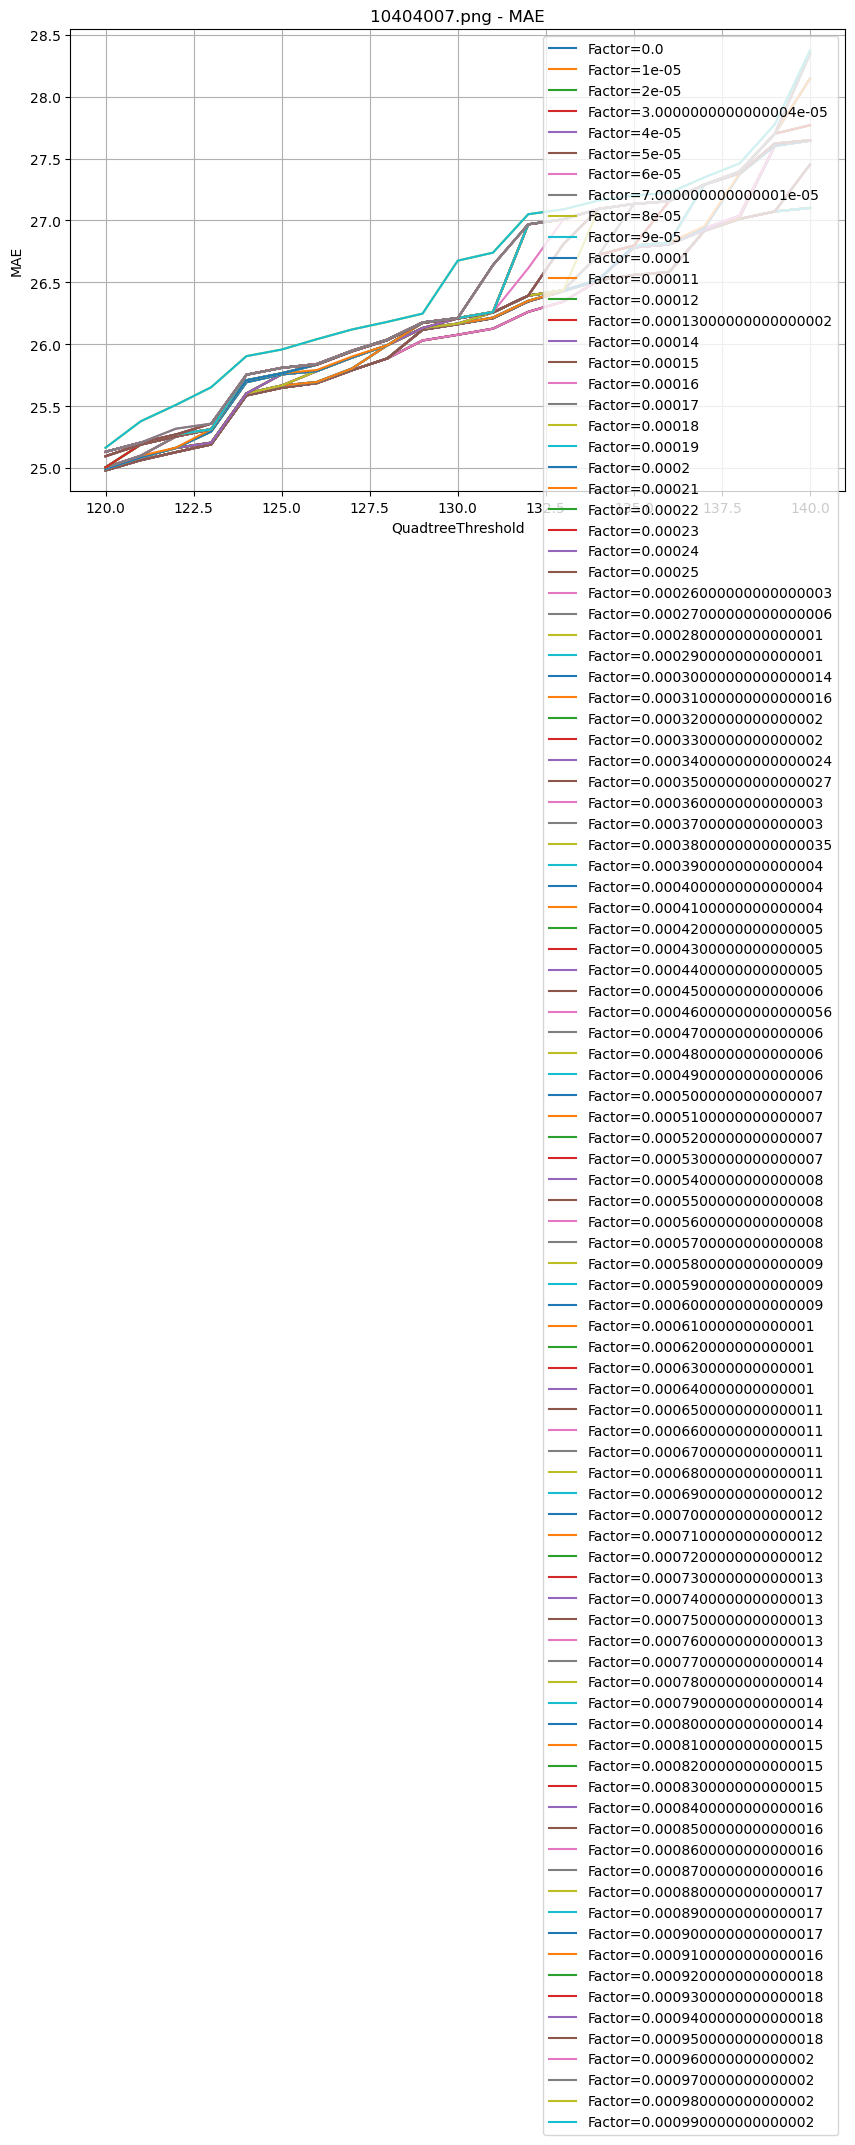

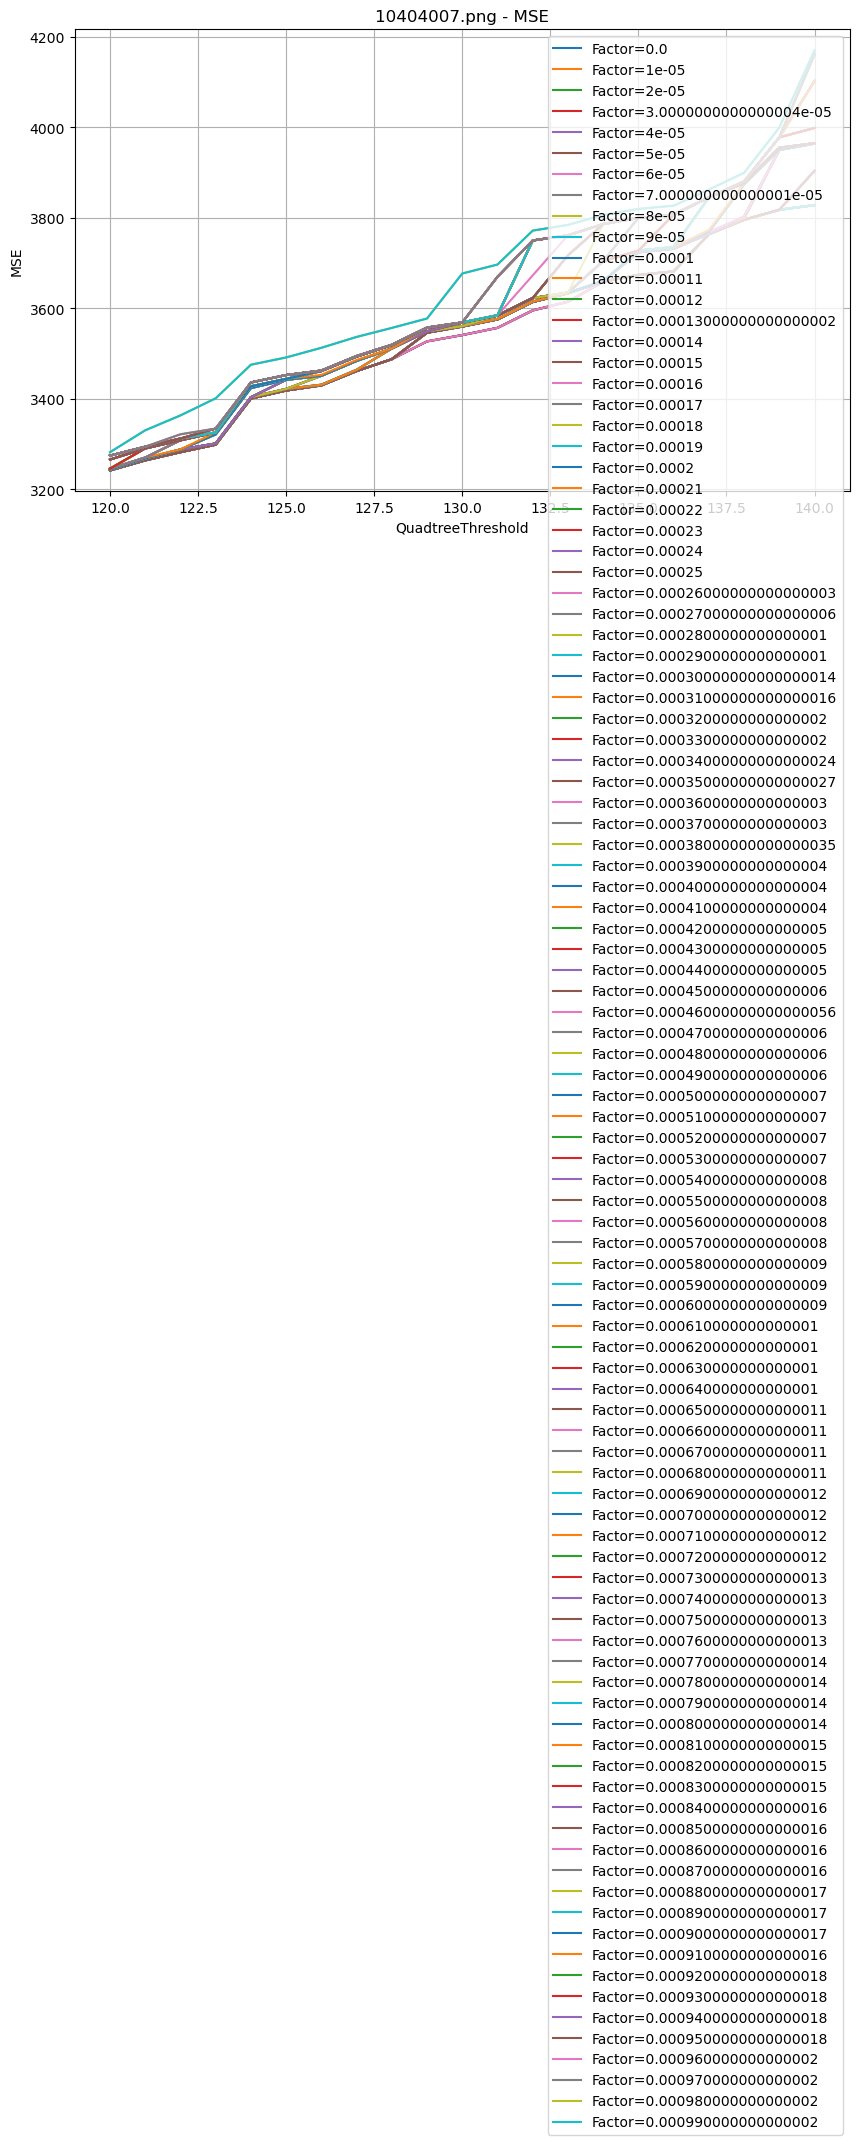

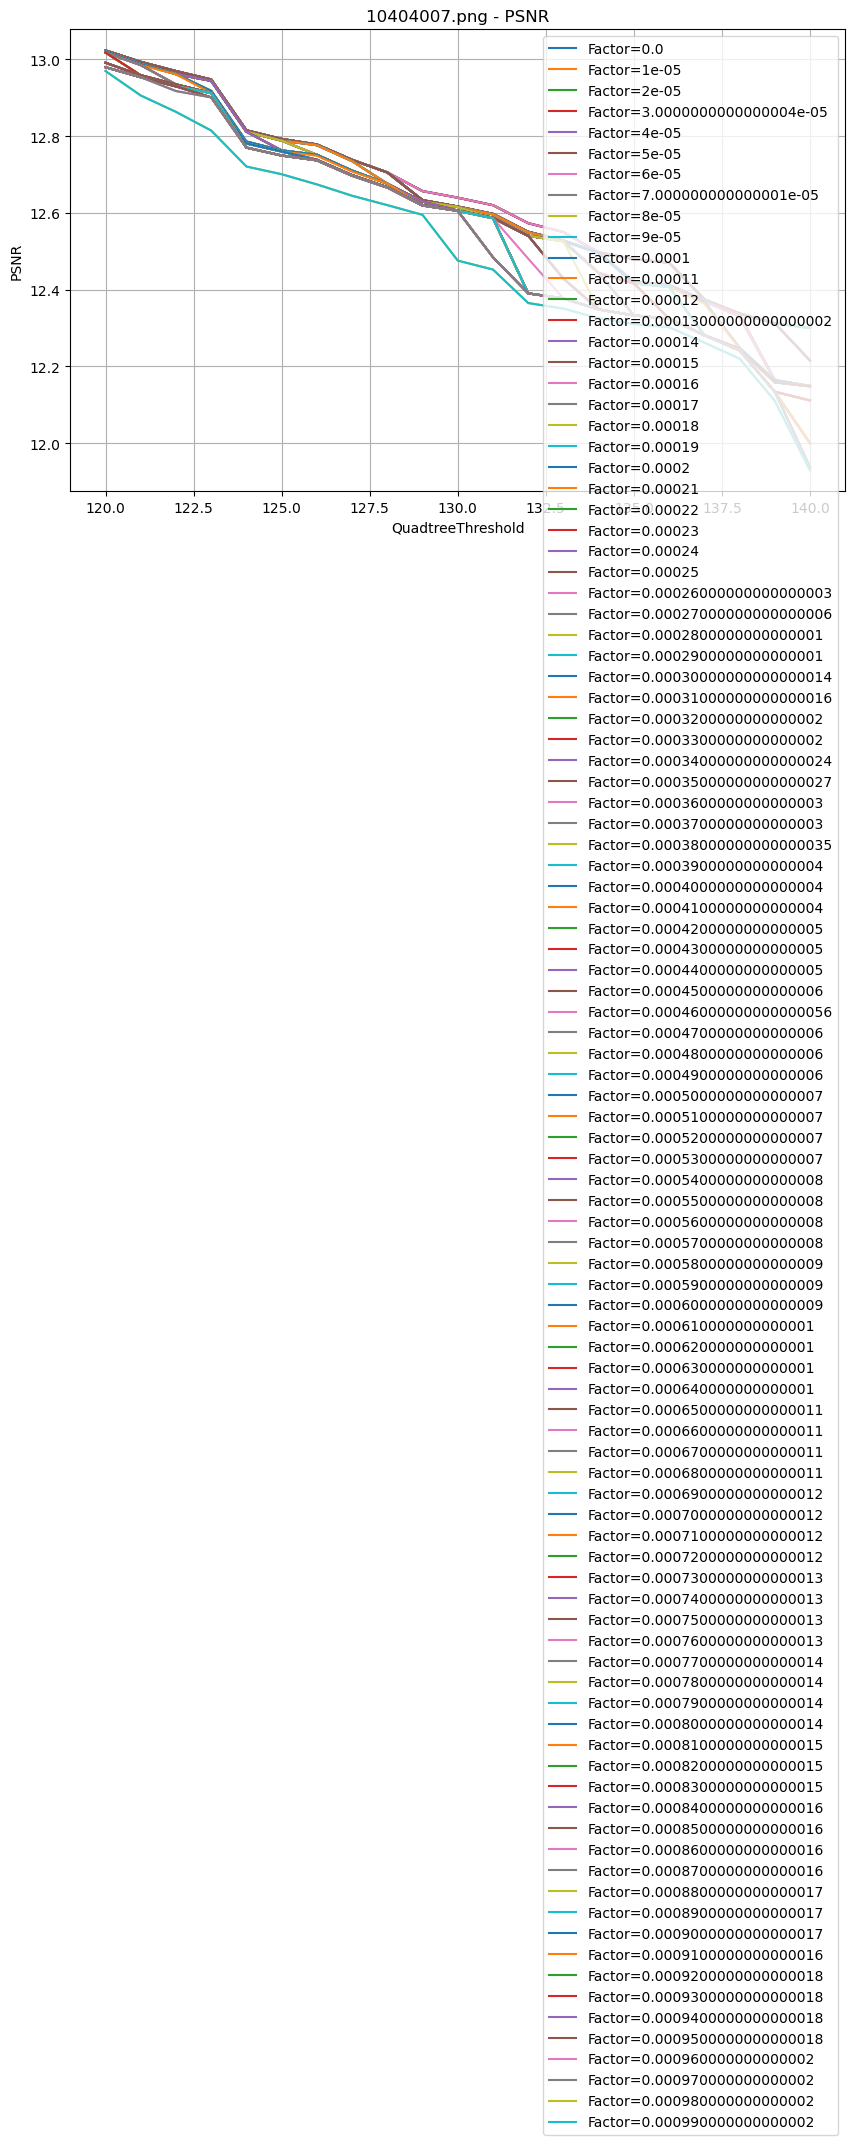

In [6]:
# List of metrics interested in
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

# Create a separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    
    # Group by AllowedExceedingThresholdFactor and plot
    for key, sub_group in singe_image_data.groupby('AllowedExceedingThresholdFactor'):
        plt.plot(sub_group['QuadtreeThreshold'], sub_group[metric], label=f'Factor={key}')
    
    plt.title(f'{image_name} - {metric}')
    plt.xlabel('QuadtreeThreshold')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()


## Analyze per Test

In [7]:
# Group the data based on 'TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor', calculate the mean for each of them 
data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()

/var/folders/y7/s3dq5fdd6pzgms8yt_kxxqw00000gn/T/ipykernel_39635/1924922927.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_test = data.groupby(['TestID', 'QuadtreeThreshold', 'AllowedExceedingThresholdFactor']).mean().reset_index()


In [8]:
data_grouped_by_test

TestID  QuadtreeThreshold  \
0     test_20231101_134331                120   
1     test_20231101_134333                120   
2     test_20231101_134333                120   
3     test_20231101_134334                120   
4     test_20231101_134335                120   
...                    ...                ...   
2095  test_20231101_140722                140   
2096  test_20231101_140723                140   
2097  test_20231101_140724                140   
2098  test_20231101_140724                140   
2099  test_20231101_140725                140   

      AllowedExceedingThresholdFactor   SN  OriginalFileSize  \
0                             0.00000  5.5          321053.7   
1                             0.00001  5.5          321053.7   
2                             0.00002  5.5          321053.7   
3                             0.00003  5.5          321053.7   
4                             0.00004  5.5          321053.7   
...                               ...  ...               ...   
2095                          0.00095  5.5          321053.7   
2096                          0.00096  5.5          321053.7   
2097                          0.00097  5.5          321053.7   
2098                          0.00098  5.5          321053.7   
2099                          0.00099  5.5          321053.7   

      CompressedBinSize  FileSizeDifference  CompressionRate  CompressionTime  \
0               32689.5            288364.2         0.910580              4.1   
1               32689.5            288364.2         0.910580              2.1   
2               32689.5            288364.2         0.910580              2.3   
3               32689.5            288364.2         0.910580              2.1   
4               32689.5            288364.2         0.910580              2.4   
...                 ...                 ...              ...              ...   
2095            14037.4            307016.3         0.963035              1.5   
2096            14037.4            307016.3         0.963035              1.8   
2097            14037.4            307016.3         0.963035              1.6   
2098            13933.4            307120.3         0.963392              1.8   
2099            13933.4            307120.3         0.963392              1.5   

      DecompressionTime  UniquePixelCountBefore  UniquePixelCountAfter  \
0                   5.5                 60908.4                 4584.8   
1                   4.5                 60908.4                 4584.8   
2                   3.9                 60908.4                 4584.8   
3                   4.2                 60908.4                 4584.8   
4                   3.9                 60908.4                 4584.8   
...                 ...                     ...                    ...   
2095                3.5                 60908.4                 1994.2   
2096                3.9                 60908.4                 1994.2   
2097                3.6                 60908.4                 1994.2   
2098                3.8                 60908.4                 1980.5   
2099                3.6                 60908.4                 1980.5   

      UniquePixelCountReduction  UniquePixelCountReductionRate        MAE  \
0                       56323.6                       0.939470  17.345540   
1                       56323.6                       0.939470  17.345540   
2                       56323.6                       0.939470  17.345540   
3                       56323.6                       0.939470  17.345540   
4                       56323.6                       0.939470  17.345540   
...                         ...                            ...        ...   
2095                    58914.2                       0.975955  30.459573   
2096                    58914.2                       0.975955  30.459573   
2097                    58914.2                       0.975955  30.459573   
2098                    58927.

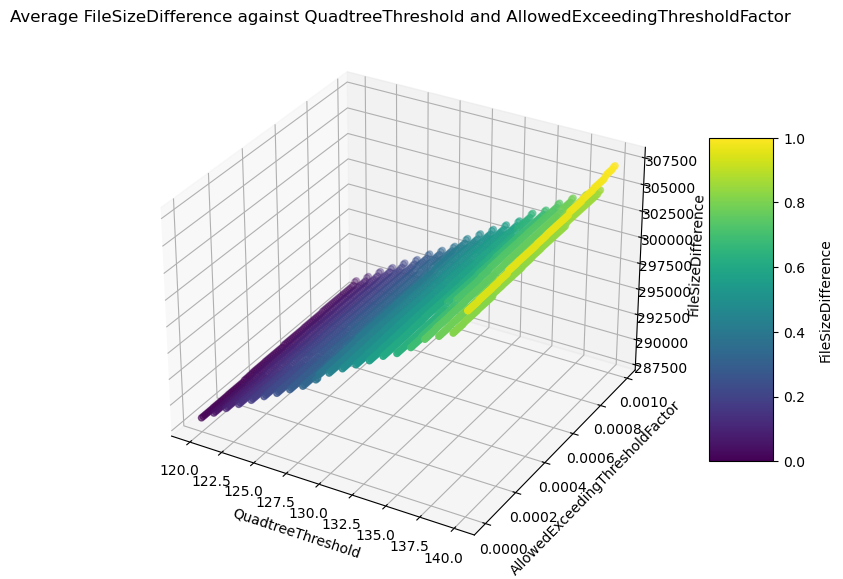

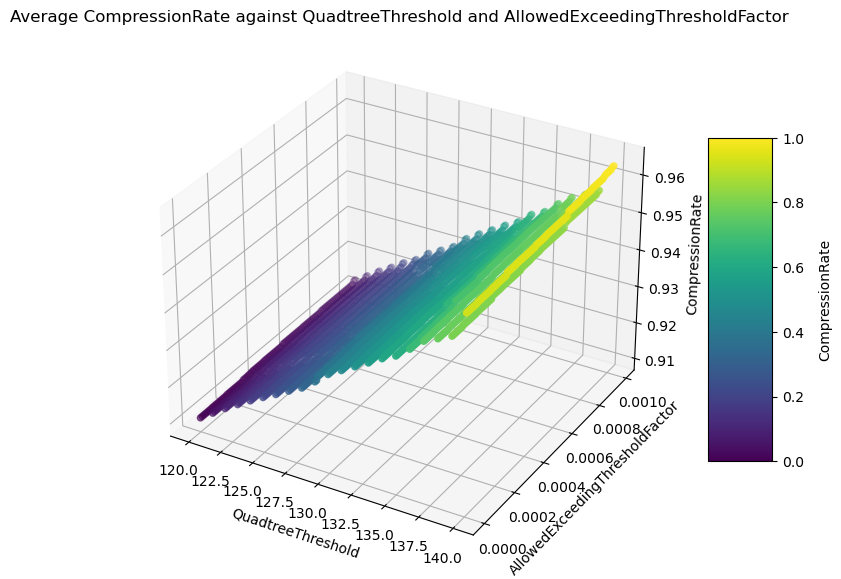

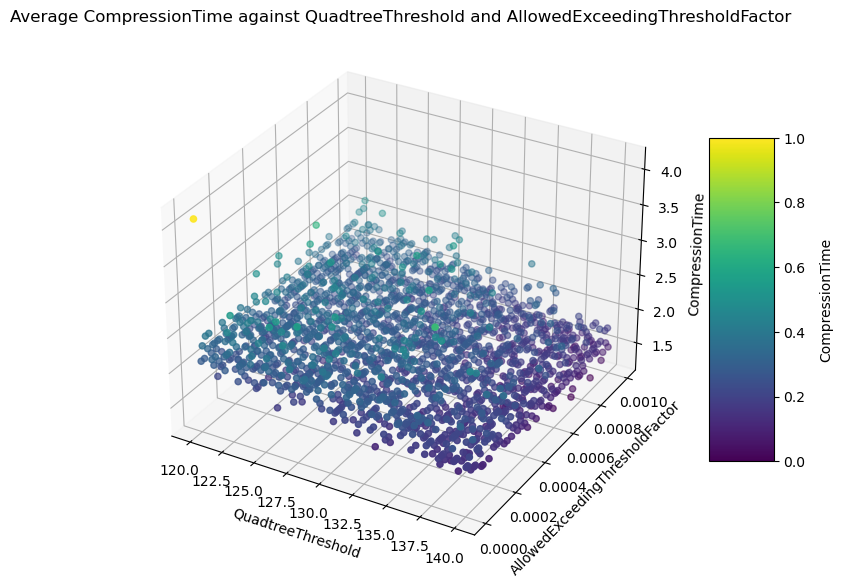

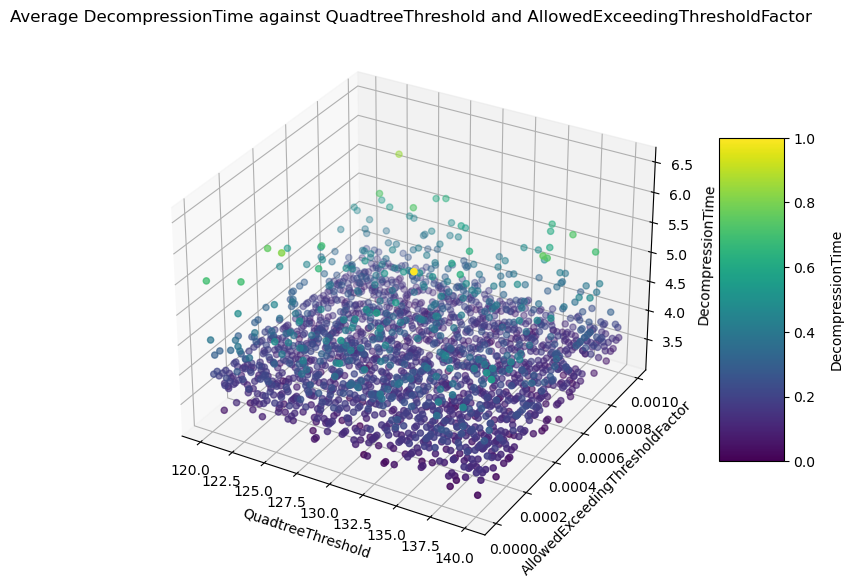

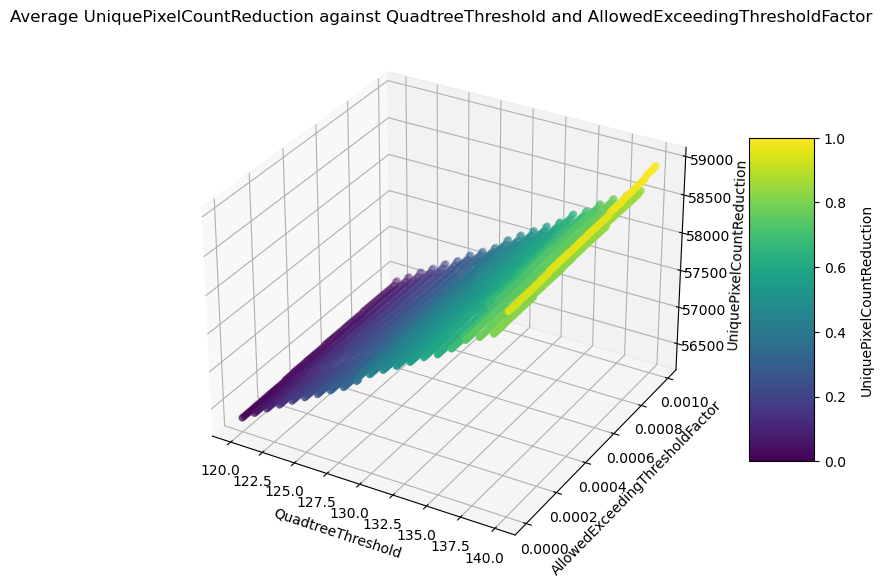

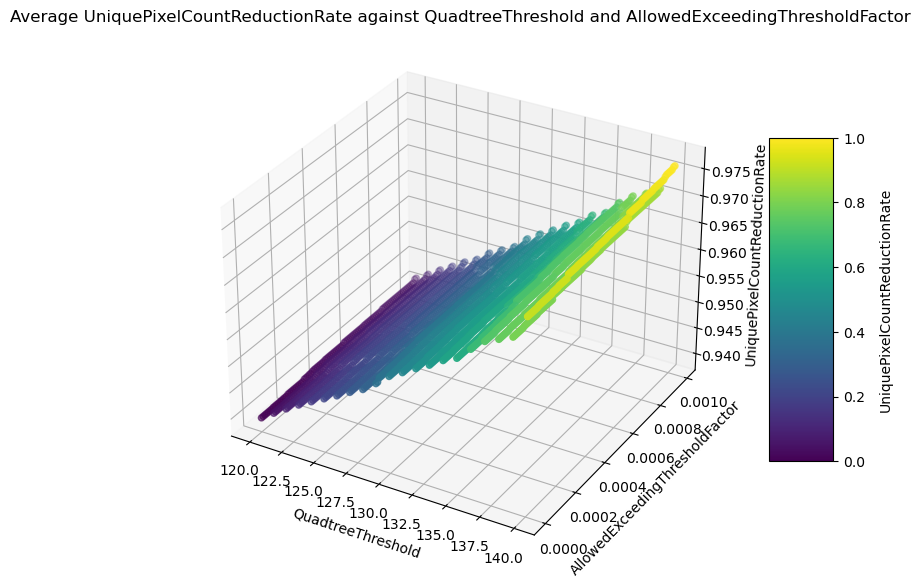

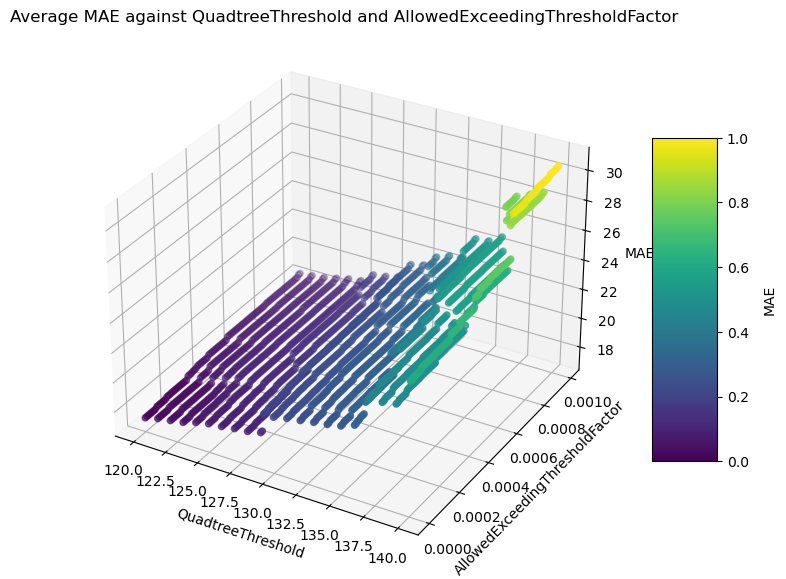

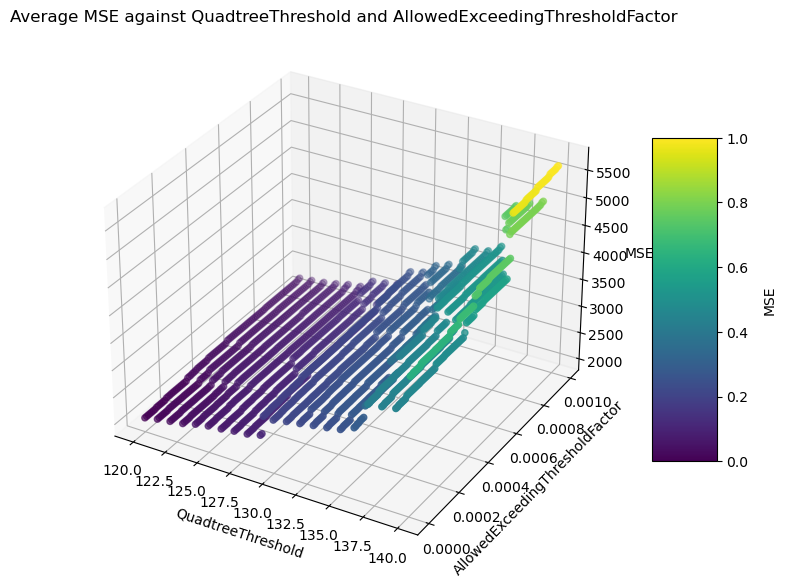

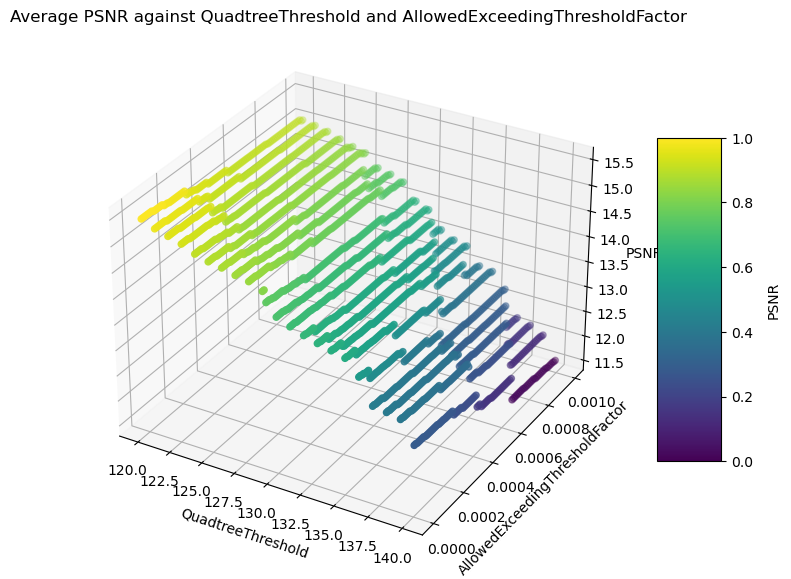

In [9]:
metrics = ['FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']

for metric in metrics:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Data for plotting
    x = data_grouped_by_test['QuadtreeThreshold']
    y = data_grouped_by_test['AllowedExceedingThresholdFactor']
    z = data_grouped_by_test[metric]
    
    # Using a colormap to represent Z values with colors
    norm = plt.Normalize(z.min(), z.max())
    colors = plt.cm.viridis(norm(z))
    sc = ax.scatter(x, y, z, c=colors)
    
    ax.set_xlabel('QuadtreeThreshold')
    ax.set_ylabel('AllowedExceedingThresholdFactor')
    ax.set_zlabel(metric)
    ax.set_title(f'Average {metric} against QuadtreeThreshold and AllowedExceedingThresholdFactor')
    
    # Adding a colorbar to the graph to indicate the scale
    cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label(metric, labelpad=10)
    
    plt.show()


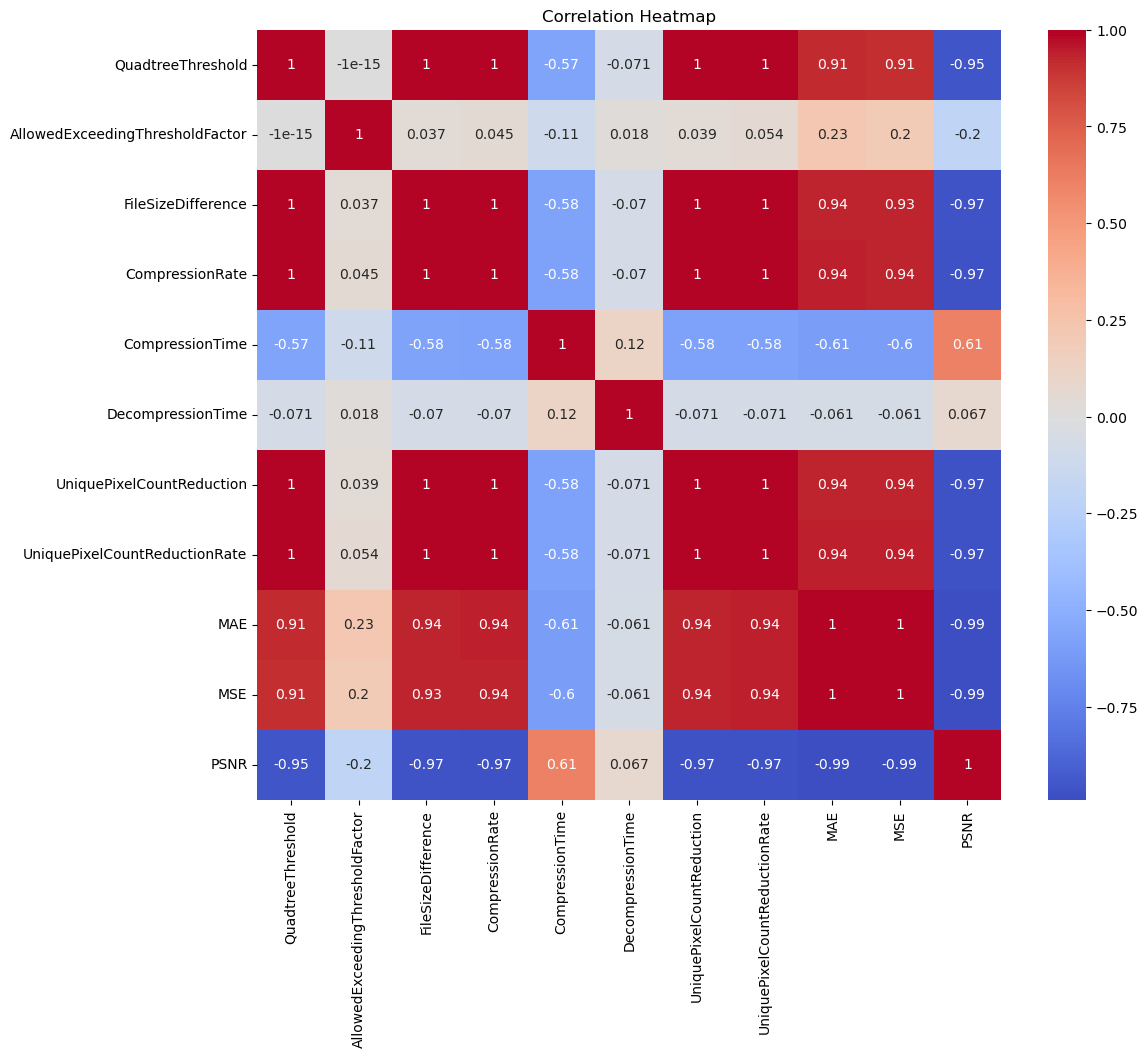

In [10]:
# Calculate the correlation matrix
correlation = data_grouped_by_test[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'FileSizeDifference', 'CompressionRate', 'CompressionTime', 'DecompressionTime', 'UniquePixelCountReduction', 'UniquePixelCountReductionRate', 'MAE', 'MSE', 'PSNR']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Score and Evaluation

In [11]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize metrics
data_grouped_by_test['CompressionRate'] = normalize(data_grouped_by_test['CompressionRate'])
data_grouped_by_test['CompressionTime'] = normalize(data_grouped_by_test['CompressionTime'])
data_grouped_by_test['DecompressionTime'] = normalize(data_grouped_by_test['DecompressionTime'])
data_grouped_by_test['MAE'] = normalize(data_grouped_by_test['MAE'])
data_grouped_by_test['MSE'] = normalize(data_grouped_by_test['MSE'])
data_grouped_by_test['PSNR'] = normalize(data_grouped_by_test['PSNR'])

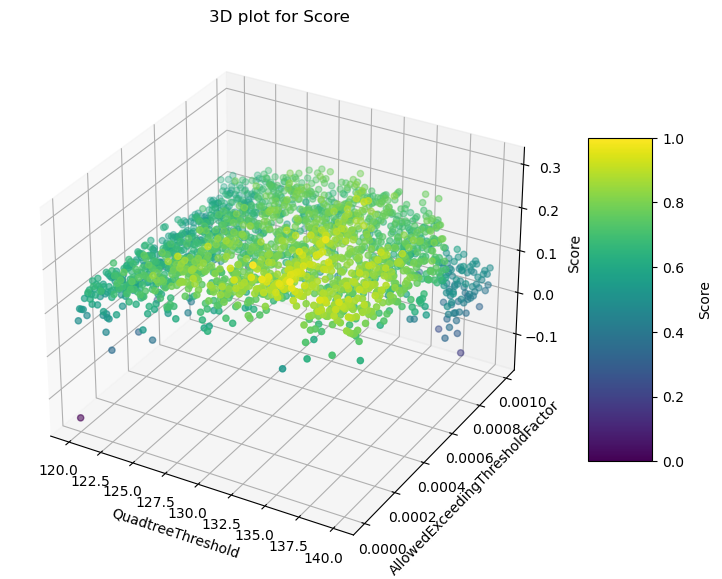

In [12]:
# Calculate LossScore
data_grouped_by_test['LossScore'] = -data_grouped_by_test['MAE'] - data_grouped_by_test['MSE'] + data_grouped_by_test['PSNR']

# Calculate the total score
data_grouped_by_test['Score'] = (5/9 * data_grouped_by_test['CompressionRate'] 
                         - 2/9 * (data_grouped_by_test['CompressionTime'] + data_grouped_by_test['DecompressionTime'])
                         + 2/9 * data_grouped_by_test['LossScore'])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data for plotting
x = data_grouped_by_test['QuadtreeThreshold']
y = data_grouped_by_test['AllowedExceedingThresholdFactor']
z = data_grouped_by_test['Score']

# Using a colormap to represent Z values (scores) with colors
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.viridis(norm(z))
sc = ax.scatter(x, y, z, c=colors)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
ax.set_title('3D plot for Score')

# Adding a colorbar to the graph
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=5)
cbar.set_label('Score', labelpad=10)

plt.show()

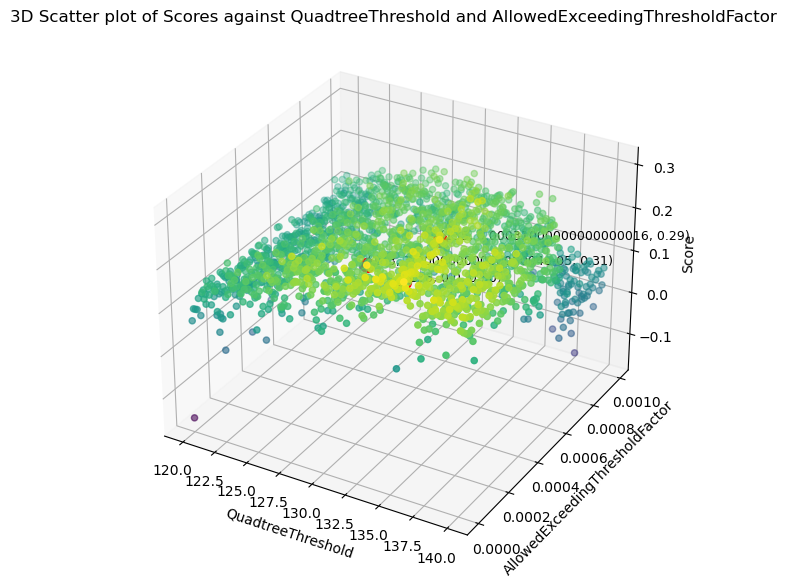

In [13]:
data_grouped_by_test = data_grouped_by_test.sort_values(by='Score', ascending=False)
top_3 = data_grouped_by_test.head(3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for all data points
ax.scatter(data_grouped_by_test['QuadtreeThreshold'], data_grouped_by_test['AllowedExceedingThresholdFactor'], data_grouped_by_test['Score'], c=data_grouped_by_test['Score'], cmap='viridis')

# Highlighting and annotating top 3 scores
for index, row in top_3.iterrows():
    ax.scatter(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], c='red', s=100)  # use larger size and red color
    label = '({}, {}, {:.2f})'.format(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'])
    ax.text(row['QuadtreeThreshold'], row['AllowedExceedingThresholdFactor'], row['Score'], label, fontsize=9)

ax.set_xlabel('QuadtreeThreshold')
ax.set_ylabel('AllowedExceedingThresholdFactor')
ax.set_zlabel('Score')
plt.title('3D Scatter plot of Scores against QuadtreeThreshold and AllowedExceedingThresholdFactor')
plt.show()

In [14]:
# Print out the top 3
print(top_3[['QuadtreeThreshold', 'AllowedExceedingThresholdFactor', 'Score']])


      QuadtreeThreshold  AllowedExceedingThresholdFactor     Score
1303                133                          0.00003  0.305497
1600                136                          0.00000  0.304271
1531                135                          0.00031  0.294660
